In [524]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

'C:\\Users\\Gnana Deva\\Desktop\\black friday'

In [464]:
df_train = pd.read_csv('train.csv/train.csv')
df_test= pd.read_csv('test.csv/test.csv')

In [465]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [466]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [467]:
df_train.shape


(550068, 12)

In [468]:
df_test.shape

(233599, 11)

In [469]:
df_total=df_train.append(df_test)
df_total.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [470]:
df_total.shape


(783667, 12)

In [471]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


# Handling missing values


In [472]:
df_total.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [473]:
df_total['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [474]:
df_total['Product_Category_2'].mode() #we considered mode for replacing na values since the data is skewed,hence using mean and median may not be appropriate.

0    8.0
dtype: float64

C:\Users\Gnana Deva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2'>

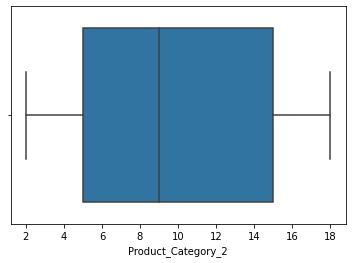

In [475]:
sns.boxplot(df_total.Product_Category_2)

C:\Users\Gnana Deva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

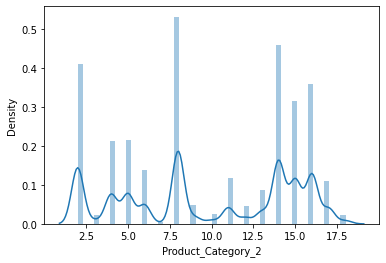

In [476]:
sns.distplot(df_total.Product_Category_2)

In [477]:
df_total['Product_Category_2'].fillna(df_total['Product_Category_2'].mode()[0],inplace=True)
print(df_total['Product_Category_2'].isnull().sum())

0


In [478]:
df_total['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [479]:
df_total['Product_Category_3'].mode()

0    16.0
dtype: float64

In [480]:
df_total['Product_Category_3'].fillna(df_total['Product_Category_3'].mode()[0],inplace=True)
print(df_total['Product_Category_3'].isnull().sum())

0


In [481]:
df_total.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

# Handling Categorical variables


In [482]:
list_of_cat_columns=[col for col in df_total.columns if df_total[col].dtype=='O']
print(list_of_cat_columns)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [483]:
print(df_total['Gender'].value_counts())

M    590031
F    193636
Name: Gender, dtype: int64


In [484]:
  
df_total[['Gender_M','Gender_F']]=pd.get_dummies(df_total['Gender'])  #Applying one-hot encoding using get_dummies
df_total['Gender_M']=df_total['Gender_M'].astype('int64')
df_total['Gender_F']=df_total['Gender_F'].astype('int64')
df_total.head(5)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [485]:
print(df_total['Age'].value_counts())

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64


In [486]:
Age_map={'0-17':0 ,'18-25':1 ,'26-35':2 ,'36-45':3 ,'46-50':4 ,'51-55':5 ,'55+':6}  #Applying guided ordinal encoding by mapping these Age intervals to integral values
df_total['Age']=df_total['Age'].map(Age_map)
df_total.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F
0,1000001,P00069042,F,0,10,A,2,0,3,8.0,16.0,8370.0,1,0
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200.0,1,0
2,1000001,P00087842,F,0,10,A,2,0,12,8.0,16.0,1422.0,1,0
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,16.0,1057.0,1,0
4,1000002,P00285442,M,6,16,C,4+,0,8,8.0,16.0,7969.0,0,1
5,1000003,P00193542,M,2,15,A,3,0,1,2.0,16.0,15227.0,0,1
6,1000004,P00184942,M,4,7,B,2,1,1,8.0,17.0,19215.0,0,1
7,1000004,P00346142,M,4,7,B,2,1,1,15.0,16.0,15854.0,0,1
8,1000004,P0097242,M,4,7,B,2,1,1,16.0,16.0,15686.0,0,1
9,1000005,P00274942,M,2,20,A,1,1,8,8.0,16.0,7871.0,0,1


In [487]:
df_total[['City_Cat_A','City_Cat_B','City_Cat_C']]= pd.get_dummies(df_total['City_Category']) #Applying one-hot encoding using get_dummies
df_total['City_Cat_A']=df_total['City_Cat_A'].astype('int64')
df_total['City_Cat_B']=df_total['City_Cat_B'].astype('int64')
df_total['City_Cat_C']=df_total['City_Cat_C'].astype('int64')
df_total.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F,City_Cat_A,City_Cat_B,City_Cat_C
0,1000001,P00069042,F,0,10,A,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,1000001,P00087842,F,0,10,A,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,1000002,P00285442,M,6,16,C,4+,0,8,8.0,16.0,7969.0,0,1,0,0,1
5,1000003,P00193542,M,2,15,A,3,0,1,2.0,16.0,15227.0,0,1,1,0,0
6,1000004,P00184942,M,4,7,B,2,1,1,8.0,17.0,19215.0,0,1,0,1,0
7,1000004,P00346142,M,4,7,B,2,1,1,15.0,16.0,15854.0,0,1,0,1,0
8,1000004,P0097242,M,4,7,B,2,1,1,16.0,16.0,15686.0,0,1,0,1,0
9,1000005,P00274942,M,2,20,A,1,1,8,8.0,16.0,7871.0,0,1,1,0,0


In [488]:


gle = LabelEncoder()                                                              #                                                                                                                                                                                                                                                                                                                    df op[l

genre_labels = gle.fit_transform(df_total['Stay_In_Current_City_Years'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
df_total['Stay_In_Current_City_Years'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(df_total['User_ID'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
df_total['User_ID'] = genre_labels


df_total.head(10)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F,City_Cat_A,City_Cat_B,City_Cat_C
0,0,684,F,0,10,A,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,0,2406,F,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,0,868,F,0,10,A,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,0,844,F,0,10,A,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,1,2769,M,6,16,C,4,0,8,8.0,16.0,7969.0,0,1,0,0,1
5,2,1857,M,2,15,A,3,0,1,2.0,16.0,15227.0,0,1,1,0,0
6,3,1771,M,4,7,B,2,1,1,8.0,17.0,19215.0,0,1,0,1,0
7,3,3364,M,4,7,B,2,1,1,15.0,16.0,15854.0,0,1,0,1,0
8,3,3649,M,4,7,B,2,1,1,16.0,16.0,15686.0,0,1,0,1,0
9,4,2665,M,2,20,A,1,1,8,8.0,16.0,7871.0,0,1,1,0,0


In [489]:
df_total.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F,City_Cat_A,City_Cat_B,City_Cat_C
0,0,684,F,0,10,A,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,0,2406,F,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,0,868,F,0,10,A,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,0,844,F,0,10,A,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,1,2769,M,6,16,C,4,0,8,8.0,16.0,7969.0,0,1,0,0,1


In [490]:
df_total.drop('City_Category',axis=1)
df_total.drop('Product_ID',axis=1,inplace=True)
df_total.drop('Gender',axis=1)

df_total.head(5)


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Gender_F,City_Cat_A,City_Cat_B,City_Cat_C
0,0,F,0,10,A,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,0,F,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,0,F,0,10,A,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,0,F,0,10,A,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,1,M,6,16,C,4,0,8,8.0,16.0,7969.0,0,1,0,0,1


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

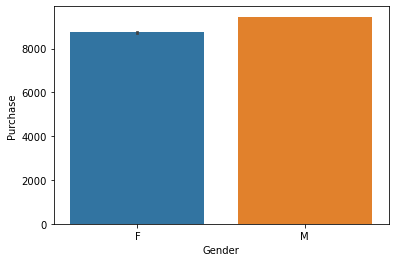

In [491]:
sns.barplot(x='Gender',y='Purchase',data= df_total)

<AxesSubplot:xlabel='Age', ylabel='count'>

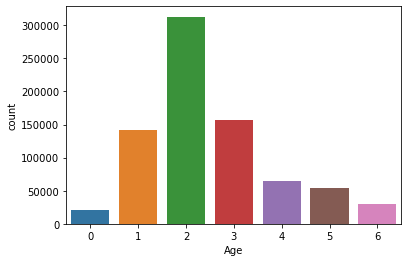

In [509]:
sns.countplot(x='Age',data= df_total)


C:\Users\Gnana Deva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

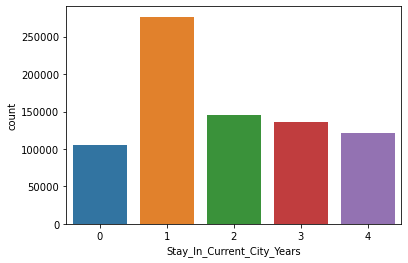

In [520]:
sns.countplot(df_total['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

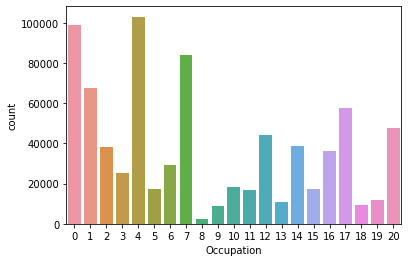

In [510]:
sns.countplot(x='Occupation',data= df_total)

<AxesSubplot:>

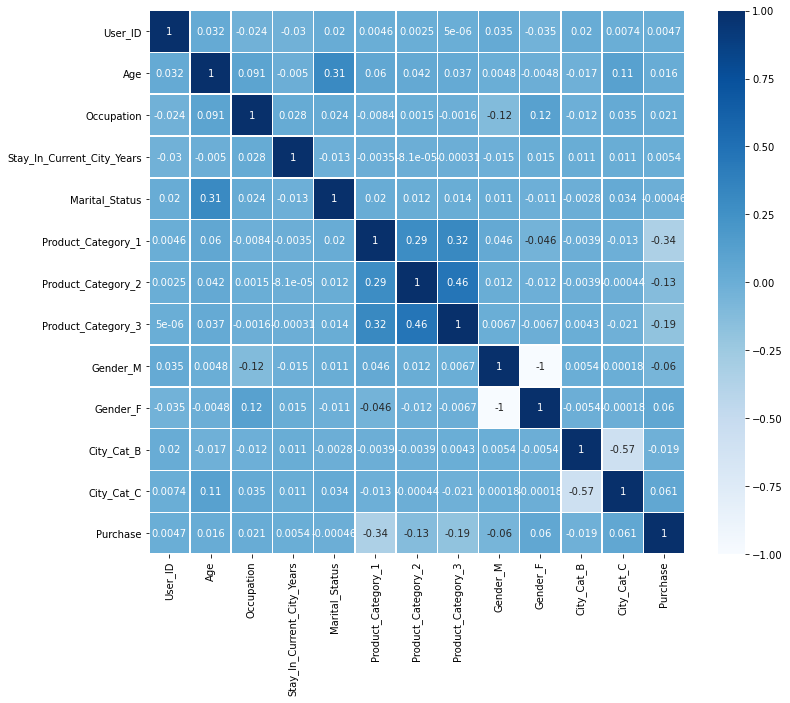

In [518]:
import seaborn as sb
import matplotlib.pyplot as plt
corr = df_total.corr()
fig, ax = plt.subplots(figsize=(12,10))  
sb.heatmap(corr, cmap="Blues", annot=True,linewidths=.5)

In [492]:
 df_total= df_total[['User_ID','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Gender_M','Gender_F','City_Cat_B','City_Cat_C','Purchase']]
df_total.head(5)

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Gender_F,City_Cat_B,City_Cat_C,Purchase
0,0,0,10,2,0,3,8.0,16.0,1,0,0,0,8370.0
1,0,0,10,2,0,1,6.0,14.0,1,0,0,0,15200.0
2,0,0,10,2,0,12,8.0,16.0,1,0,0,0,1422.0
3,0,0,10,2,0,12,14.0,16.0,1,0,0,0,1057.0
4,1,6,16,4,0,8,8.0,16.0,0,1,0,1,7969.0


In [493]:
train_data= df_total.loc[~(df_total['Purchase'].isnull())]
print(train_data.shape)
train_data.head(5)    

(550068, 13)


,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Gender_F,City_Cat_B,City_Cat_C,Purchase
0,0,0,10,2,0,3,8.0,16.0,1,0,0,0,8370.0
1,0,0,10,2,0,1,6.0,14.0,1,0,0,0,15200.0
2,0,0,10,2,0,12,8.0,16.0,1,0,0,0,1422.0
3,0,0,10,2,0,12,14.0,16.0,1,0,0,0,1057.0
4,1,6,16,4,0,8,8.0,16.0,0,1,0,1,7969.0


In [494]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Gender_M                    550068 non-null  int64  
 9   Gender_F                    550068 non-null  int64  
 10  City_Cat_B                  550068 non-null  int64  
 11  City_Cat_C                  550068 non-null  int64  
 12  Purchase                    550068 non-null  float64
dtypes: float64(3),

In [495]:
test_data= df_total.loc[df_total['Purchase'].isnull(),:'City_Cat_C']
print(test_data.shape)
test_data.head(5)

(233599, 12)


,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Gender_F,City_Cat_B,City_Cat_C
0,3,4,7,2,1,1,11.0,16.0,0,1,1,0
1,8,2,17,0,0,3,5.0,16.0,0,1,0,1
2,9,3,1,4,1,5,14.0,16.0,1,0,1,0
3,9,3,1,4,1,4,9.0,16.0,1,0,1,0
4,10,2,1,1,0,4,5.0,12.0,1,0,0,1


In [496]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int32  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   Gender_M                    233599 non-null  int64  
 9   Gender_F                    233599 non-null  int64  
 10  City_Cat_B                  233599 non-null  int64  
 11  City_Cat_C                  233599 non-null  int64  
dtypes: float64(2), int32(1), int64(9)
memory usage: 22.3 MB


In [497]:
X = train_data.drop("Purchase",axis=1)
X.head(5)

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Gender_F,City_Cat_B,City_Cat_C
0,0,0,10,2,0,3,8.0,16.0,1,0,0,0
1,0,0,10,2,0,1,6.0,14.0,1,0,0,0
2,0,0,10,2,0,12,8.0,16.0,1,0,0,0
3,0,0,10,2,0,12,14.0,16.0,1,0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1,0,1


In [498]:
y = train_data['Purchase']
y.head(5)

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [499]:
X = train_data.drop("Purchase",axis=1)

y = train_data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [500]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Intercept:",regressor.intercept_)
print("\nSlope:",regressor.coef_)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Intercept: 12989.417232742688

Slope: [ 2.22241313e-02  1.27206290e+02  5.81023135e+00  4.53937300e+00
 -5.99246887e+01 -4.02077588e+02 -1.35773921e+00 -1.56719786e+02
 -2.56147123e+02  2.56147123e+02  1.43293503e+02  6.60480040e+02]
Mean Absolute Error: 3584.0374338138377
Mean Squared Error: 21959968.559058126
Root Mean Squared Error: 4686.146450876042


In [501]:

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2387.51317797704
Mean Squared Error: 11838034.615995925
Root Mean Squared Error: 3440.6445059023354


In [502]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=66, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2159.3038638860894
Mean Squared Error: 8910503.04838883
Root Mean Squared Error: 2985.0465739061474


In [503]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=66, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2292.939700851842
Mean Squared Error: 9052801.526568621
Root Mean Squared Error: 3008.7873847396763


In [504]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 10, alpha = 15, n_estimators = 100)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2115.654076176235
Mean Squared Error: 8033334.823262187
Root Mean Squared Error: 2834.3138187685195


In [505]:
xg_reg.fit(X.values, y.values)

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [506]:

test_predict= xg_reg.predict(test_data)
test_data['Purchase']=test_predict


Purchase distribution for the test data <seaborn.axisgrid.FacetGrid object at 0x000001D4E5FDF790>


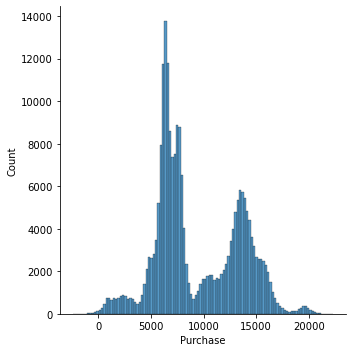

In [507]:
print("Purchase distribution for the test data", sns.displot(test_data['Purchase']))

In [508]:
test_data.head(5)

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Gender_F,City_Cat_B,City_Cat_C,Purchase
0,3,4,7,2,1,1,11.0,16.0,0,1,1,0,14625.674805
1,8,2,17,0,0,3,5.0,16.0,0,1,0,1,11286.977539
2,9,3,1,4,1,5,14.0,16.0,1,0,1,0,7440.670410
3,9,3,1,4,1,4,9.0,16.0,1,0,1,0,2901.107178
4,10,2,1,1,0,4,5.0,12.0,1,0,0,1,2975.976074
